In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
print(" sucess")

 sucess


In [4]:
df=pd.read_csv("E:\\6th semmmm\\feature engineering datasets\\outliers\\placement.csv")
df.head()

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0


In [5]:
df.shape

(1000, 3)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


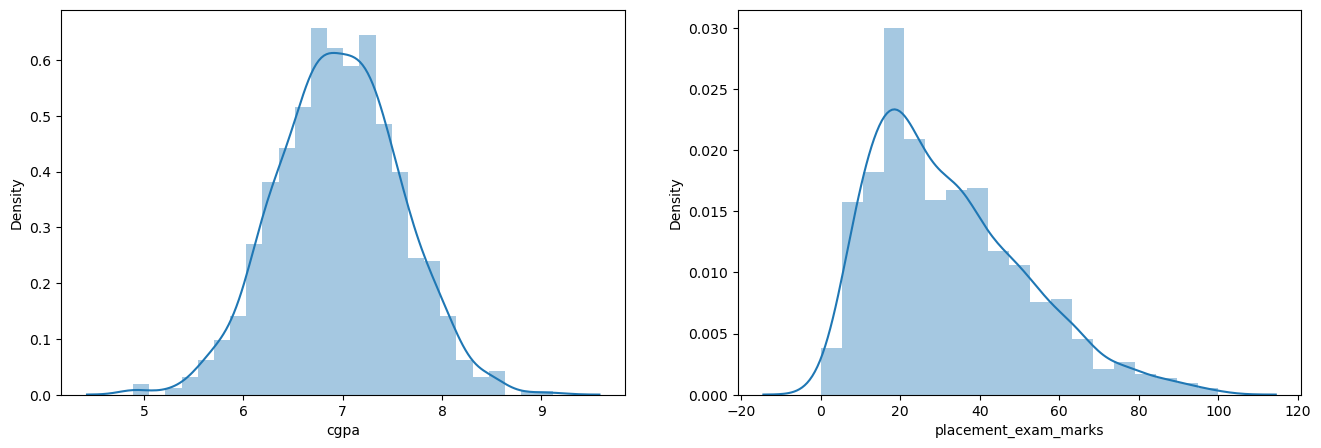

In [10]:
# show  the distribution with the kde and the histogram
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df['cgpa'])

plt.subplot(1,2,2)
sns.distplot(df['placement_exam_marks'])
plt.show()


In [11]:
df['placement_exam_marks'].describe()

count    1000.000000
mean       32.225000
std        19.130822
min         0.000000
25%        17.000000
50%        28.000000
75%        44.000000
max       100.000000
Name: placement_exam_marks, dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='placement_exam_marks'>

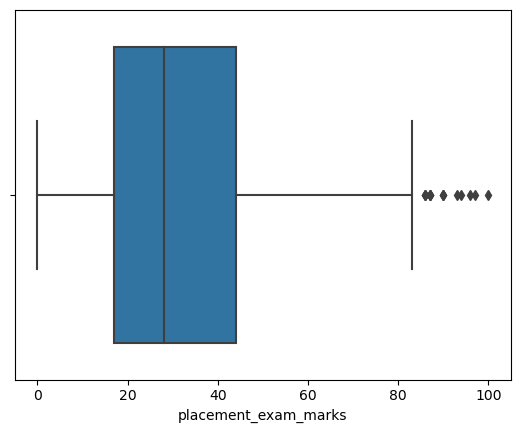

In [12]:
sns.boxplot(df['placement_exam_marks'])

In [13]:
# findings the inter quartile ranges 
percentile25=df['placement_exam_marks'].quantile(0.25)
percentile75=df['placement_exam_marks'].quantile(0.75)
print(percentile75)
print(percentile25)

44.0
17.0


In [15]:
iqr=percentile75-percentile25
iqr

27.0

In [16]:
upper_limit=percentile75 + 1.5*iqr
lower_limit=percentile25- 1.5*iqr
print(upper_limit)
lower_limit

84.5


-23.5

# findings the outliers

In [17]:
df[df['placement_exam_marks']>upper_limit]

,cgpa,placement_exam_marks,placed
9,7.75,94.0,1
40,6.60,86.0,1
61,7.51,86.0,0
134,6.33,93.0,0
162,7.80,90.0,0
283,7.09,87.0,0
290,8.38,87.0,0
311,6.97,87.0,1
324,6.64,90.0,0
630,6.56,96.0,1


In [18]:
df[df['placement_exam_marks']<lower_limit]

,cgpa,placement_exam_marks,placed


# trimming the datas 

In [19]:
new_df=df[df['placement_exam_marks']<upper_limit]

In [20]:
new_df.shape  # there are 15 outliers in our datasets 

(985, 3)

In [21]:
df.shape

(1000, 3)

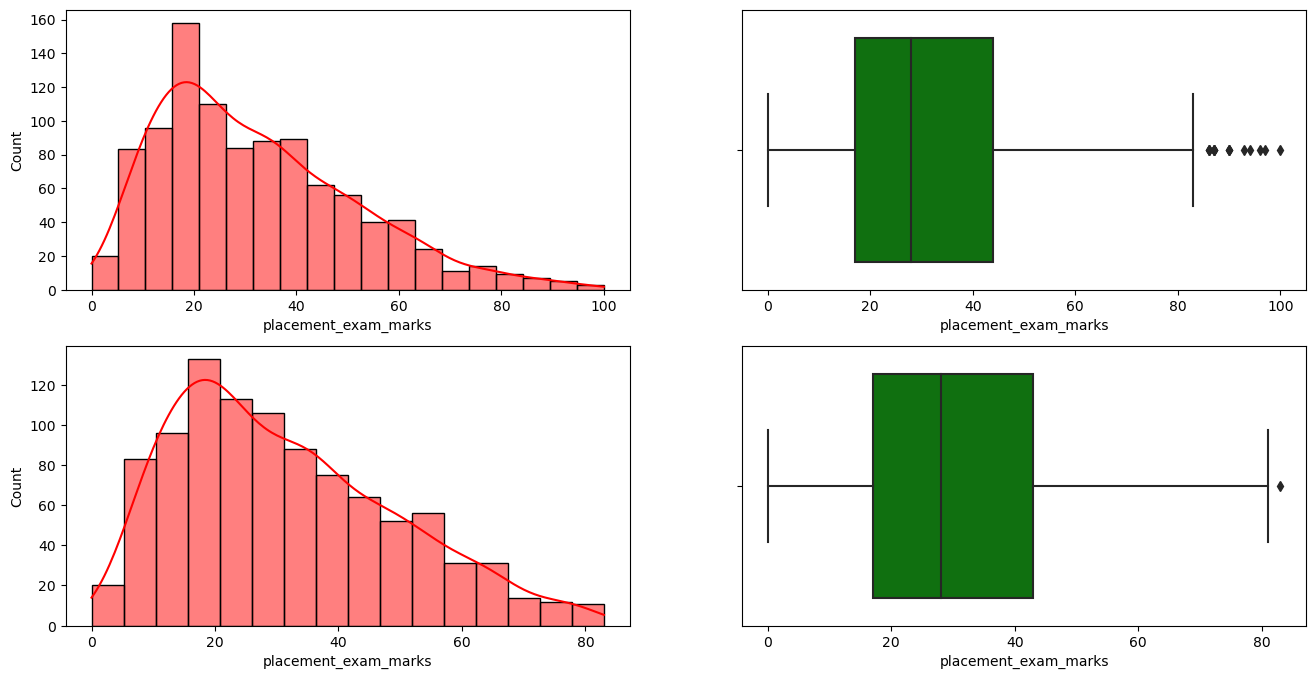

In [38]:
# comparisons of the before and aftert the change in the distributuions 
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.histplot(data=df,x=df['placement_exam_marks'],kde=True,color='red')

plt.subplot(2,2,2)
sns.boxplot(data=df,x=df['placement_exam_marks'],color='green')

plt.subplot(2,2,3)
sns.histplot(data=df,x=new_df['placement_exam_marks'],kde=True,color='red')

plt.subplot(2,2,4)
sns.boxplot(data=new_df,x=new_df['placement_exam_marks'],color='green')

plt.show()

# this will completely removes the outliers 


# remove the outlier from the cgpa

In [23]:
cpercentile25=df['cgpa'].quantile(0.25)
cpercentile75=df['cgpa'].quantile(0.75)
print(percentile75)
print(percentile25)

44.0
17.0


In [24]:
iqr=cpercentile75-cpercentile25
iqr

0.8200000000000003

In [25]:
upper_limit=cpercentile75 + 1.5*iqr
lower_limit=cpercentile25- 1.5*iqr
print(upper_limit)
lower_limit

8.600000000000001


5.319999999999999

In [26]:
df[df['cgpa']>upper_limit]  # upper limits

,cgpa,placement_exam_marks,placed
995,8.87,44.0,1
996,9.12,65.0,1
998,8.62,46.0,1


In [27]:
df[df['cgpa']<lower_limit]  # there are 4 outlier in the first and the lasts 

,cgpa,placement_exam_marks,placed
278,5.23,17.0,1
485,4.92,44.0,1
815,5.27,43.0,0
997,4.89,34.0,0
999,4.90,10.0,1


In [28]:
new_df2=df[(df['cgpa']>lower_limit)& (df['cgpa']<upper_limit)]

In [29]:
len(new_df2)  # this is the value without the outlierss 

992

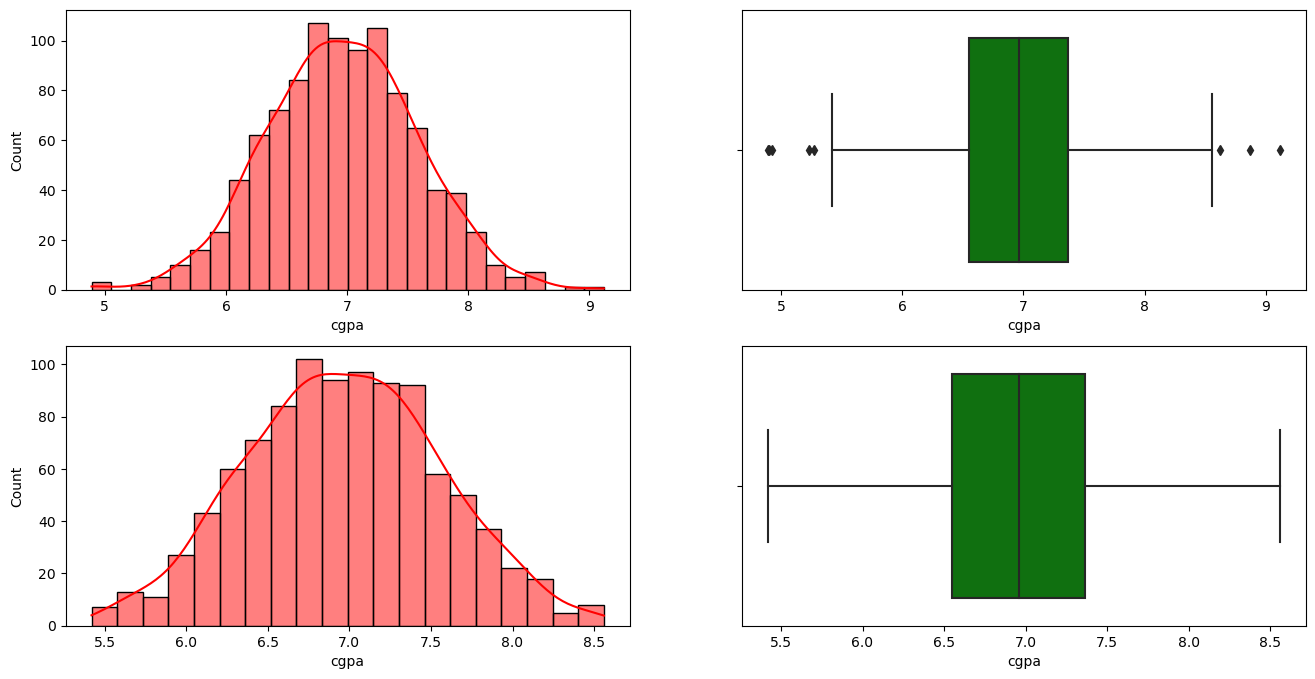

In [36]:
# comparisons of the outliers 
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.histplot(data=df,x=df['cgpa'],kde=True,color='red')

plt.subplot(2,2,2)
sns.boxplot(data=df,x=df['cgpa'],color='green')

plt.subplot(2,2,3)
sns.histplot(data=new_df2,x=new_df2['cgpa'],kde=True,color='red')

plt.subplot(2,2,4)
sns.boxplot(data=new_df2,x=new_df2['cgpa'],color='green')

plt.show()
# in this case we remove all the outliers present in our datsets 


In [42]:
# cappingt the datas
new_df_cap=df.copy()  # all the data of the df is copied in the new_df_cap
new_df_cap.shape

(1000, 3)

In [43]:
new_df_cap['cgpa']=np.where(new_df_cap['cgpa']>upper_limit,upper_limit, np.where(
new_df_cap['cgpa']<lower_limit,lower_limit, new_df_cap['cgpa']))
print(" sucess")

 sucess


In [44]:
new_df_cap.shape

(1000, 3)

In [45]:
df['cgpa'].describe()

count    1000.000000
mean        6.961240
std         0.615898
min         4.890000
25%         6.550000
50%         6.960000
75%         7.370000
max         9.120000
Name: cgpa, dtype: float64

In [47]:
print(upper_limit)
print(lower_limit)
new_df_cap['cgpa'].describe()  # there is a slight change in the datas distributions 

8.600000000000001
5.319999999999999


count    1000.000000
mean        6.961820
std         0.609285
min         5.320000
25%         6.550000
50%         6.960000
75%         7.370000
max         8.600000
Name: cgpa, dtype: float64

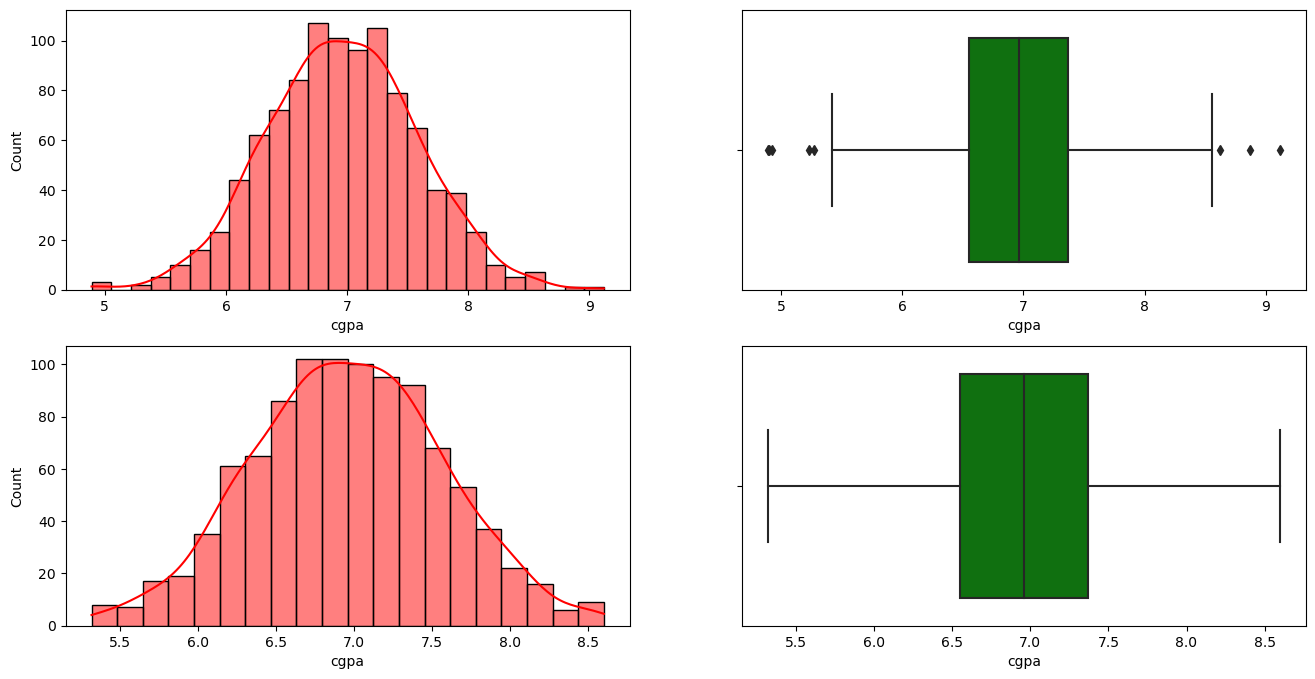

In [48]:
# comparisons using the box plot and the histplots
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.histplot(data=df,x=df['cgpa'],kde=True,color='red')

plt.subplot(2,2,2)
sns.boxplot(data=df,x=df['cgpa'],color='green')

plt.subplot(2,2,3)
sns.histplot(data=new_df_cap,x=new_df_cap['cgpa'],kde=True,color='red')

plt.subplot(2,2,4)
sns.boxplot(data=new_df_cap,x=new_df_cap['cgpa'],color='green')

plt.show()

In [50]:
# check the skewness pof the datas
print("before" ,df['cgpa'].skew())
print("after " ,new_df_cap['cgpa'].skew())
print(" difference ",np.abs(df['cgpa'].skew()-new_df_cap['cgpa'].skew()))

before -0.014529938929314918
after  0.007380624203209477
 difference  0.021910563132524395
